<h3>Apply Decision Tree to predict diabetes</h3>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 
import graphviz

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Splitting data**

In [4]:
X=df.values[:,:-1]
y=df.values[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=22)

**Model construction**

In [5]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

y_predict=clf.predict(X_test)

**Model Evaluation**

In [6]:
print('Confusion matrix : \n',confusion_matrix(y_predict,y_test))
print('\nAccuracy score : ',accuracy_score(y_predict,y_test))
print('\nClassification report : \n',classification_report(y_predict,y_test,zero_division=0.0))

Confusion matrix : 
 [[115  34]
 [ 35  47]]

Accuracy score :  0.7012987012987013

Classification report : 
               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77       149
         1.0       0.58      0.57      0.58        82

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



**Information gain**

In [7]:
ig=pd.DataFrame({'Feature':df.columns[:-1],'Information Gain':clf.feature_importances_})
ig

,Feature,Information Gain
0,Pregnancies,0.038255
1,Glucose,0.279839
2,BloodPressure,0.050580
3,SkinThickness,0.045082
4,Insulin,0.043738
5,BMI,0.210916
6,DiabetesPedigreeFunction,0.121933
7,Age,0.209658


**Visualization**

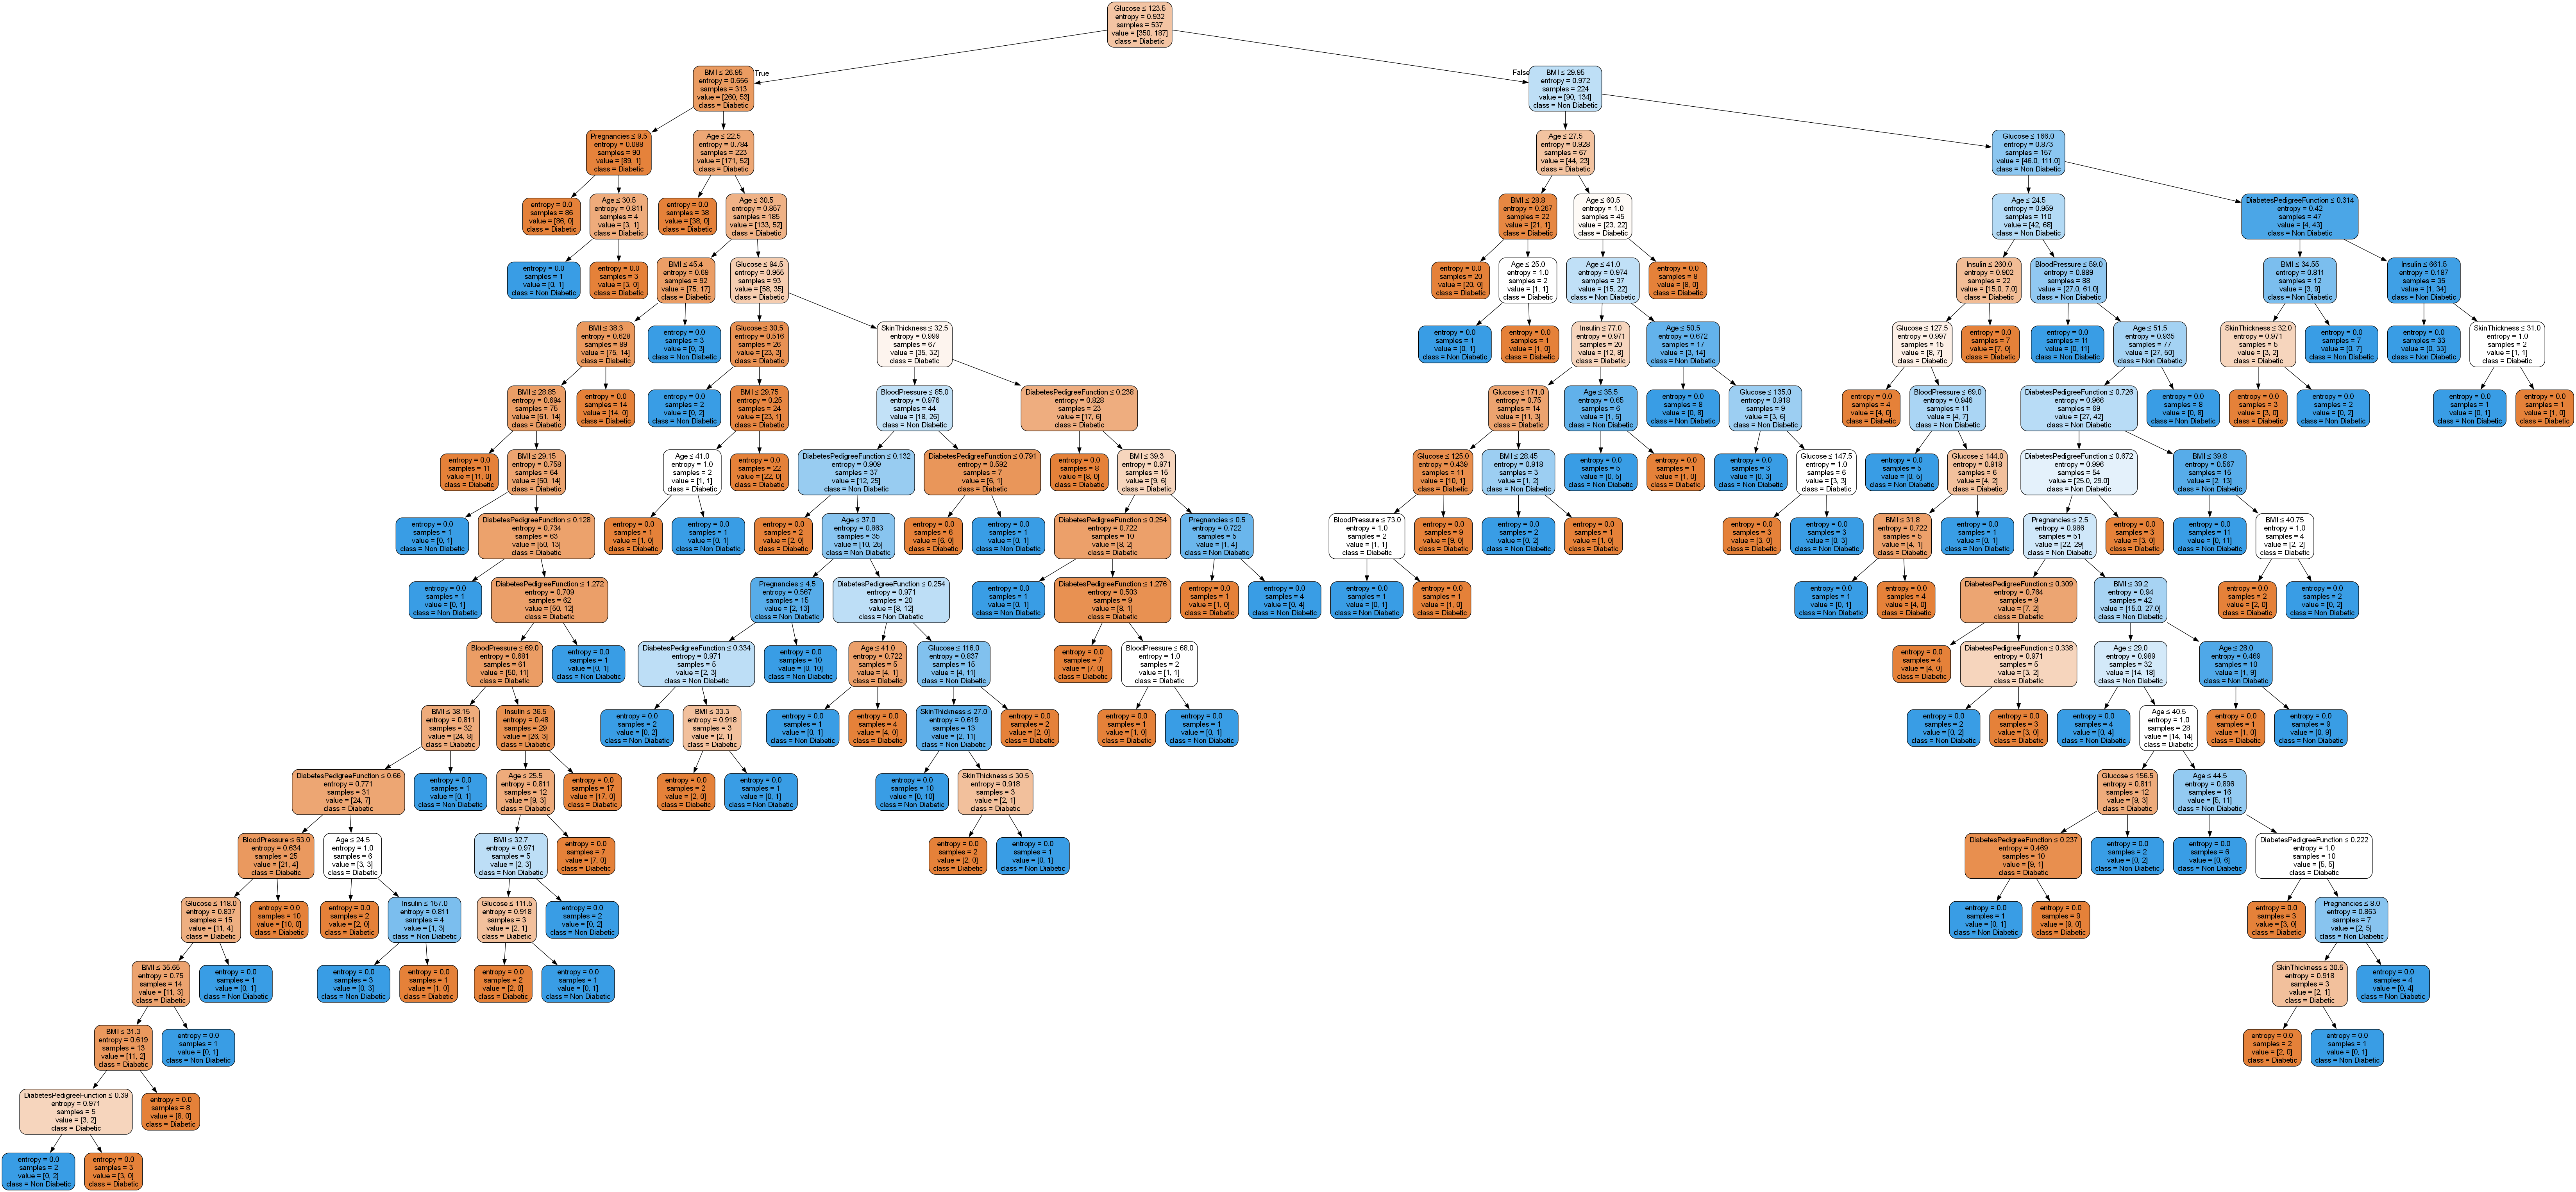

In [8]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=df.columns[:-1],class_names=['Diabetic','Non Diabetic'],
                                filled=True,rounded=True, special_characters=True)

graph=graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=False)

from IPython.display import Image
Image(filename="decision_tree.png")

<h3>Apply Decision Tree to predict whether a team plays tennis based on weather conditions</h3>

In [9]:
df=pd.read_csv('play_tennis.csv')
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


**Data preprocessing**

In [10]:
from sklearn.preprocessing import LabelEncoder

df=df.apply(lambda col:LabelEncoder().fit_transform(col))
df

,day,outlook,temp,humidity,wind,play
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


**Splitting dataset**

In [11]:
X=df.values[:,:-1]
y=df.values[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=22)

**Model construction**

In [12]:
clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

y_predict=clf.predict(X_test)

**Model Evaluation**

In [13]:
print('Confusion matrix : \n',confusion_matrix(y_predict,y_test))
print('\nAccuracy score : ',accuracy_score(y_predict,y_test))
print('\nClassification report : \n',classification_report(y_predict,y_test,zero_division=0.0))

Confusion matrix : 
 [[0 0]
 [3 2]]

Accuracy score :  0.4

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57         5

    accuracy                           0.40         5
   macro avg       0.50      0.20      0.29         5
weighted avg       1.00      0.40      0.57         5



**Information gain**

In [14]:
ig=pd.DataFrame({'Feature':df.columns[:-1],'Information Gain':clf.feature_importances_})
ig

,Feature,Information Gain
0,day,1.0
1,outlook,0.0
2,temp,0.0
3,humidity,0.0
4,wind,0.0


**Visualization**

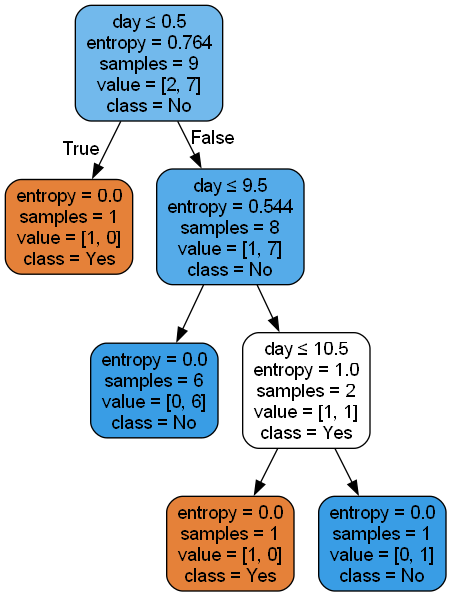

In [15]:
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=df.columns[:-1],class_names=['Yes','No'],
                                filled=True,rounded=True, special_characters=True)

graph=graphviz.Source(dot_data)
graph.render("categ_decision_tree", format="png", cleanup=False)

from IPython.display import Image
Image(filename="categ_decision_tree.png")